In [1]:
#Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
#Download the cvs file
#Read the csv, notice sep=','.. For CSV files created in Norwegian excel we need to use sep=';'#
#df = pd.read_csv(url, na_values=' ') we can use this for automatically convert blank space to nan values
#We will check which columns in the DataFrame (df) have missing (NaN) values.
# df.isna().sum():this will show the sum of NaN values in each column.
url= r"C:\Users\berry\OneDrive - OsloMet\AI\Lab-2\Titanic.csv"
df = pd.read_csv(url, sep=',')
df.isna().sum()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\berry\\OneDrive - OsloMet\\AI\\Lab-2\\Titanic.csv'

In [ ]:
#For Age and Fare, we will fill NaN values with the median value of each column.
#For Embarked, we will fill NaN values with the mode (or 'S' as suggested).
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Fare"].fillna(df["Fare"].median(), inplace=True)
df["Embarked"].fillna('S', inplace=True)

In [ ]:
#We will create a new column, HasCabin, that will be True if there is a value in the Cabin column and False if it is NaN.
# ~ is a NOT operator, so this will be True where Cabin is NOT null.
df["HasCabin"] = ~df.Cabin.isnull()

In [ ]:
#We can check the first few rows of the DataFrame to ensure everything has been applied correctly.
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [ ]:
#We are going to use a regular expression (regex) to extract the title from the name and store it in a new column called "Title".
df["Title"] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

In [ ]:
#Check whether a new column 'Title' is added to the DataFrame.
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,Mr


In [ ]:
#We need to count how many times each title appears in the dataset.
df["Title"].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [ ]:
#We are going to replace specific titles like "Mlle" and "Ms" with "Miss", and "Mme" with "Mr".
df["Title"] = df["Title"].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mr'})

In [ ]:
#We are going to group all infrequent titles into a single category "Unique".
unique_titles = ['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Sir', 'Jonkheer', 'Don', 'Lady', 'Countess', 'Dona']  # Include all the infrequent titles here
df["Title"] = df["Title"].replace(unique_titles, 'Unique')

In [ ]:
#We can recount the values to ensure the replacements were made correctly.
df["Title"].value_counts()

Title
Mr        758
Miss      264
Mrs       197
Master     61
Unique     29
Name: count, dtype: int64

C:\Users\berry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\berry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\berry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

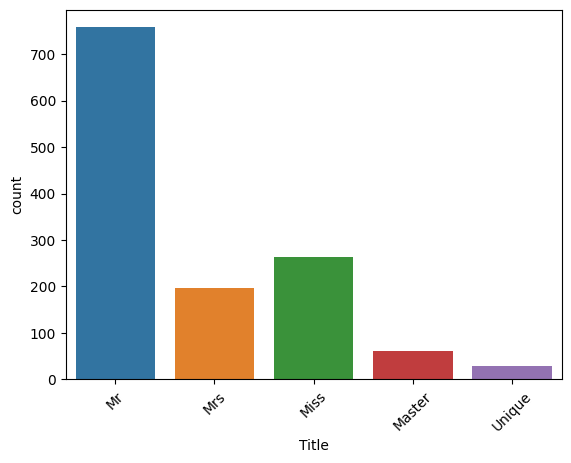

In [ ]:
#We are going to to plot the count of each title.
sns.countplot(x='Title', data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#We will convert 'Age' into Categorical Data.
df['CatAge'] = pd.qcut(df["Age"], q=4, labels=False)

In [ ]:
#We will convert 'Fare' into Categorical Data.
df['CatFare'] = pd.qcut(df["Fare"], q=4, labels=False)

In [ ]:
#After that, we will verify changes.
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Title,CatAge,CatFare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Mr,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,Mrs,3,3
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,Miss,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,Mrs,2,3
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,Mr,2,1


In [ ]:
#We are going to drop unnecessary columns
df = df.drop(["Name", "Ticket", "Fare", "Cabin", "Age"], axis=1)

In [ ]:
#We are going to convert categorical data to binary.
df = pd.get_dummies(df)

In [ ]:
df.head()

,PassengerId,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,1,3,1,0,False,0,0,False,True,False,False,True,False,False,True,False,False
1,2,1,1,0,True,3,3,True,False,True,False,False,False,False,False,True,False
2,3,3,0,0,False,1,1,True,False,False,False,True,False,True,False,False,False
3,4,1,1,0,True,2,3,True,False,False,False,True,False,False,False,True,False
4,5,3,0,0,False,2,1,False,True,False,False,True,False,False,True,False,False
